## PREDICTING THE SALES FOR A PARTICULAR CHAIN OF SUPERMARKETS.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
df = pd.read_csv('sales_prediction.csv')

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


***Performing EDA on the Dataset***

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Seem like the varibales "Item_Weight" and "Outlet_Size" have null values.

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Checking out the numeric data only
numeric = df.select_dtypes(exclude=['object'])

In [8]:
numeric.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
6,13.650,0.012741,57.6588,1987,343.5528
7,NaN,0.127470,107.7622,1985,4022.7636
8,16.200,0.016687,96.9726,2002,1076.5986
9,19.200,0.094450,187.8214,2007,4710.5350


In [9]:
numeric.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

***Visualizing the data to check for any outliers***

In [10]:
def visual(dataframe, col_name):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(data=dataframe, x = col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y = col_name, ax=ax[1])

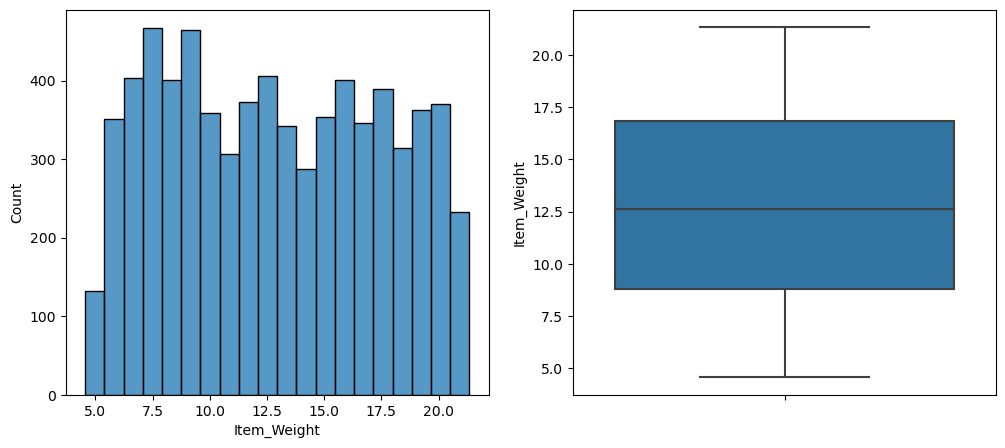

In [11]:
visual(df, 'Item_Weight')

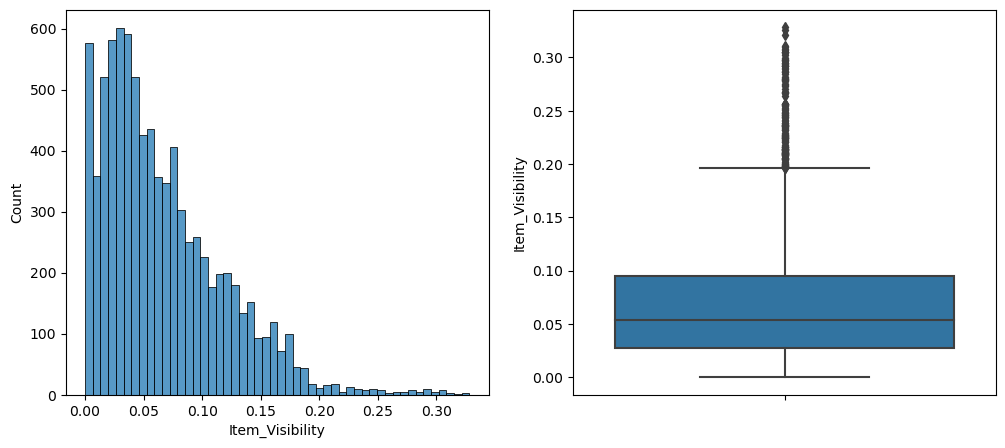

In [12]:
visual(df, 'Item_Visibility')

#### Item Visibility seems to be a right skewed distribution with many outliers which are not actually outliers. 

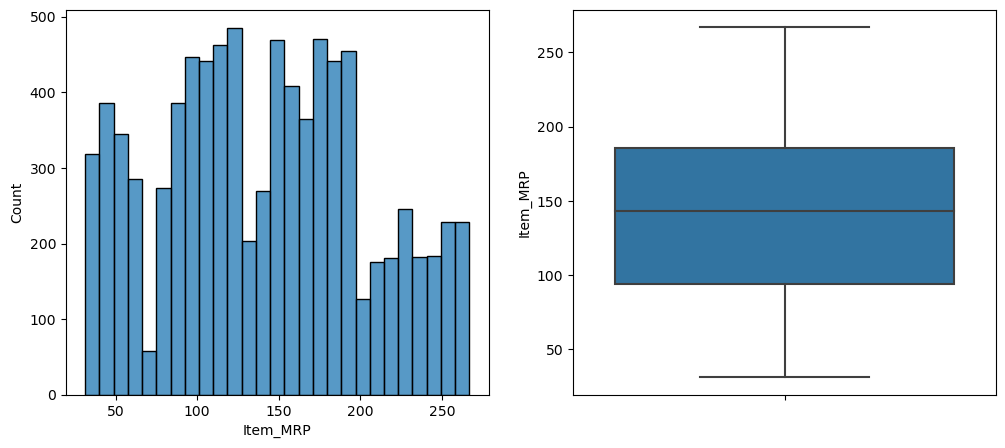

In [13]:
visual(df, 'Item_MRP')

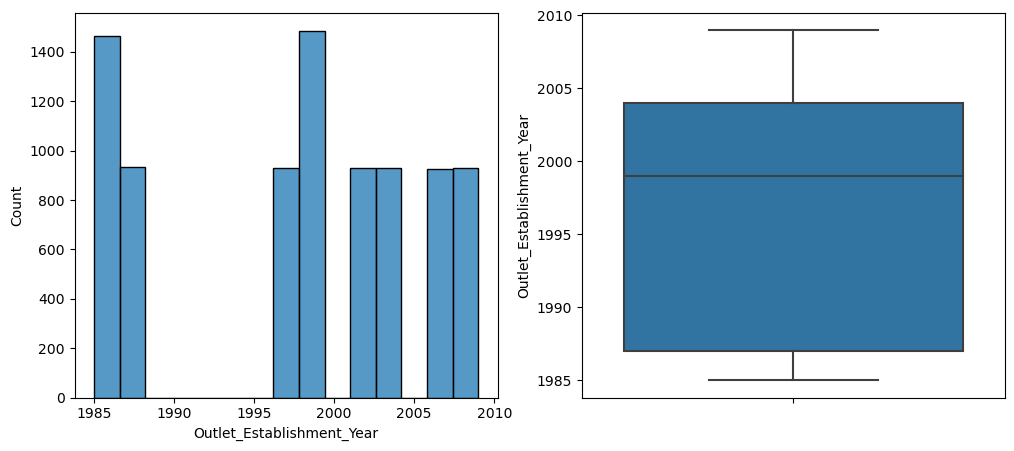

In [14]:
visual(df, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

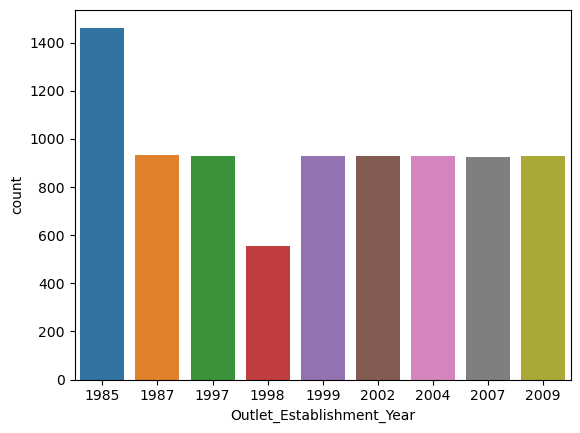

In [15]:
sns.countplot(data=df, x='Outlet_Establishment_Year')

### We have visualized the numeric data and did not find any significant outliers in the dataset. 

In [16]:
objects = df.select_dtypes(include=['object'])

In [17]:
objects.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [18]:
objects.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [19]:
objects.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [20]:
cols = objects.columns

In [21]:
def value():
    for i in cols:
        print (objects[i].value_counts())
        print(" ")

In [22]:
value()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
 
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
 
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

***The Low Fat, low fat and LF variables are same; Regular and reg variables are also same. Thus we are supposed to combine them. Other data types seem to alright***

***Item_Identifier variable is manipulated to get the right features that can be used in the model***

In [23]:
objects['Item_Identifier'].apply(lambda x : x[:2]).value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [24]:
df['Item_Type'] = df['Item_Identifier'].str[:2]

In [25]:
df["Item_Type"] = df['Item_Type'].replace({"FD":"Food", "NC":"Non-Consumables", "DR":"Drinks"})

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Non-Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
df.groupby(by='Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [29]:
df[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
118,DRA12,11.60
2879,DRA24,NaN
1148,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
1267,NCZ53,9.60
1896,NCZ54,NaN


In [30]:
df[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
754,Drinks,6.280
165,Drinks,19.500
163,Drinks,7.270
158,Drinks,13.850
1004,Drinks,14.500
...,...,...
1517,Non-Consumables,12.850
265,Non-Consumables,16.350
1578,Non-Consumables,10.695
1187,Non-Consumables,17.750


In [31]:
df['Item_Identifier'].nunique()

1559

Imputing the Null Values for the Variable Item_Type
We map the Item_weight values to the unique values of Item_Identifier and then use it for replacing the null values
In case, the new data for testing not contain the Item_Identifier value, then we map it with the median of the Item Weight
based on Item_type variable. 

In [32]:
Item_id_pivots = df.pivot_table(values = 'Item_Weight', index="Item_Identifier").reset_index()

In [33]:
Item_id_pivots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Identifier  1555 non-null   object 
 1   Item_Weight      1555 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.4+ KB


In [34]:
Item_id_pivots.head()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115


In [35]:
Item_id_mapping = dict(zip(Item_id_pivots['Item_Identifier'], Item_id_pivots['Item_Weight']))
list(Item_id_mapping.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [36]:
Item_type_pivots = df.pivot_table(values = 'Item_Weight', index="Item_Type", aggfunc='median').reset_index()

In [37]:
Item_type_pivots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Type    3 non-null      object 
 1   Item_Weight  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [38]:
Item_type_pivots.head()

,Item_Type,Item_Weight
0,Drinks,11.8
1,Food,12.6
2,Non-Consumables,13.0


In [39]:
Item_type_mapping = dict(zip(Item_type_pivots['Item_Type'], Item_type_pivots['Item_Weight']))
list(Item_type_mapping.items())

[('Drinks', 11.8), ('Food', 12.6), ('Non-Consumables', 13.0)]

In [40]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Identifier"].map(Item_id_mapping))

df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Type"].map(Item_type_mapping))
                                                                 
                                                                 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
# Now missing value imputation is to be done for the Outlet_Size variable
df.groupby(by = ['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

***From the above output we can impute the values Small for Grocery_store, Medium for Supermarket Type 2 and Supermarket Type 3
and for Supermarket Type 1, though there are three Outlet_size, we fill it with Small only as it is the most occured value 
which is the mode***

In [44]:
Outlet_type_pivot = df.pivot_table(values="Outlet_Size", index="Outlet_Type", aggfunc=(lambda x : x.mode()[0])).reset_index()

In [45]:
Outlet_type_mapping = dict(zip(Outlet_type_pivot["Outlet_Type"], Outlet_type_pivot["Outlet_Size"]))

In [46]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Type"].map(Outlet_type_mapping))

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***The Item_Fat_Content does not have consistent values and they have to be treated***

In [48]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [49]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF" : "Low Fat", 
                                                         "low fat" : "Low Fat", 
                                                          "reg" : "Regular" })

In [50]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [51]:
df.groupby(by=["Item_Type", "Item_Fat_Content"]).size()

Item_Type        Item_Fat_Content
Drinks           Low Fat              728
                 Regular               71
Food             Low Fat             3190
                 Regular             2935
Non-Consumables  Low Fat             1599
dtype: int64

***It can be observed that the Non-Consumables of Item_Type has Low Fat which may be a data entry issue. Thus it is replaced to Inedibles as per the domain experts*** 

In [52]:
df.loc[df["Item_Type"] == "Non-Consumables", "Item_Fat_Content"] = "Inedible"

In [53]:
df.groupby(by=["Item_Type", "Item_Fat_Content"]).size()

Item_Type        Item_Fat_Content
Drinks           Low Fat              728
                 Regular               71
Food             Low Fat             3190
                 Regular             2935
Non-Consumables  Inedible            1599
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

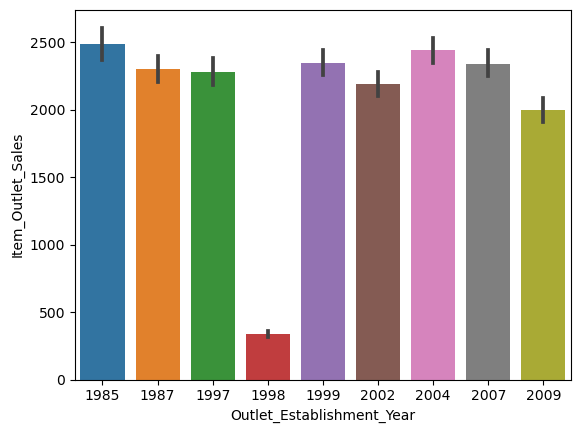

In [55]:
sns.barplot(x = df['Outlet_Establishment_Year'],y = df['Item_Outlet_Sales'] )

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

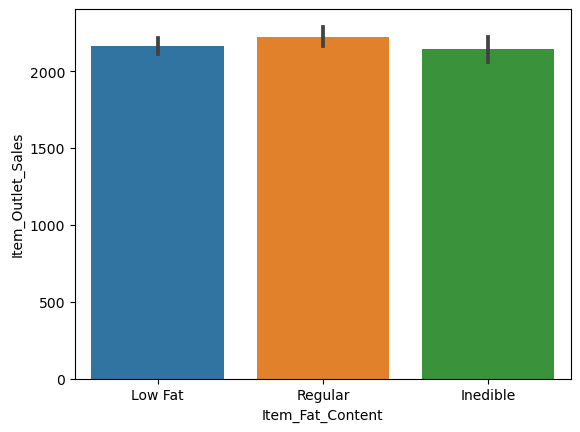

In [56]:
sns.barplot(x = df['Item_Fat_Content'],y = df['Item_Outlet_Sales'] )

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

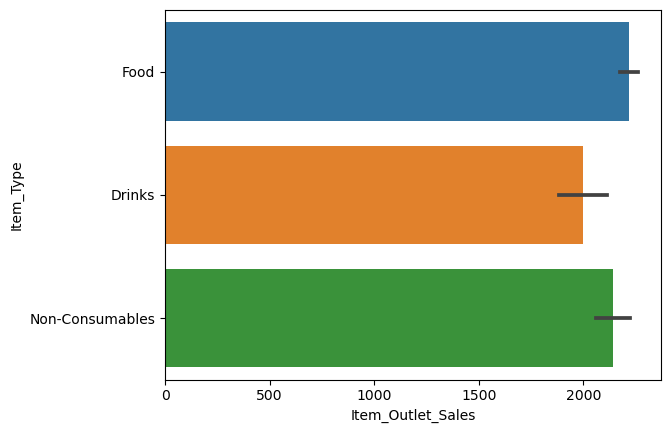

In [57]:
sns.barplot(y = df['Item_Type'], x = df['Item_Outlet_Sales'])

### The Data analysis has been done so far and the null values were imputed according to the requirements, the inconsistencies in the data were also rectified. Now the data has to be prepared for modelling. 

In [58]:
df.shape

(8523, 12)

In [59]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Inedible,0.000000,Non-Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Food,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Food,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Food,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Food,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Food,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [60]:
objects.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [61]:
cols=objects.columns

#### Based on the unique values of the Categorical columns in the dataset, we use either Label encoding or one-hot encoding.

In [62]:
def unique(cols):
    for i in cols:
        print(i)
        print(df[i].unique())
        print(" ")
    

In [63]:
unique(cols)

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
 
Item_Fat_Content
['Low Fat' 'Regular' 'Inedible']
 
Item_Type
['Food' 'Drinks' 'Non-Consumables']
 
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
 
Outlet_Size
['Medium' 'Small' 'High']
 
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
 
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
 


In [64]:
df["Item_Identifier"].nunique()

1559

In [65]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875291,0.066132,140.992782,1997.831867,2181.288914
std,4.645012,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [66]:
#### Label encoder is used for the variable Item_Identifier and One hot encoding for all the other categorical variables. 

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
lbc = LabelEncoder()

In [69]:
df["Item_Identifier"] = lbc.fit_transform(df["Item_Identifier"])

In [70]:
df.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.875291,0.066132,140.992782,1997.831867,2181.288914
std,449.222377,4.645012,0.051598,62.275067,8.371760,1706.499616
min,0.000000,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,395.500000,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,783.000000,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,1167.000000,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,1558.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [71]:
df["Item_Identifier"].value_counts()

Item_Identifier
1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: count, Length: 1559, dtype: int64

In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,1297,8.93,Inedible,0.000000,Non-Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
objects = df.select_dtypes(include=['object'])

In [74]:
objects.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [75]:
objects.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Food,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Food,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Food,OUT010,Small,Tier 3,Grocery Store
4,Inedible,Non-Consumables,OUT013,High,Tier 3,Supermarket Type1


In [76]:
df = pd.get_dummies(data = df, columns = objects.columns, drop_first = True, dtype=int)

In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non-Consumables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,662,17.50,0.016760,141.6180,1999,2097.2700,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1121,19.20,0.000000,182.0950,1998,732.3800,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1297,8.93,0.000000,53.8614,1987,994.7052,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non-Consumables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,662,17.50,0.016760,141.6180,1999,2097.2700,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1121,19.20,0.000000,182.0950,1998,732.3800,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1297,8.93,0.000000,53.8614,1987,994.7052,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   int32  
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_MRP                       8523 non-null   float64
 4   Outlet_Establishment_Year      8523 non-null   int64  
 5   Item_Outlet_Sales              8523 non-null   float64
 6   Item_Fat_Content_Low Fat       8523 non-null   int32  
 7   Item_Fat_Content_Regular       8523 non-null   int32  
 8   Item_Type_Food                 8523 non-null   int32  
 9   Item_Type_Non-Consumables      8523 non-null   int32  
 10  Outlet_Identifier_OUT013       8523 non-null   int32  
 11  Outlet_Identifier_OUT017       8523 non-null   int32  
 12  Outlet_Identifier_OUT018       8523 non-null   i

### The Data has been prepared for modelling and thus we start by creating a Linear Regression model. 

<Axes: >

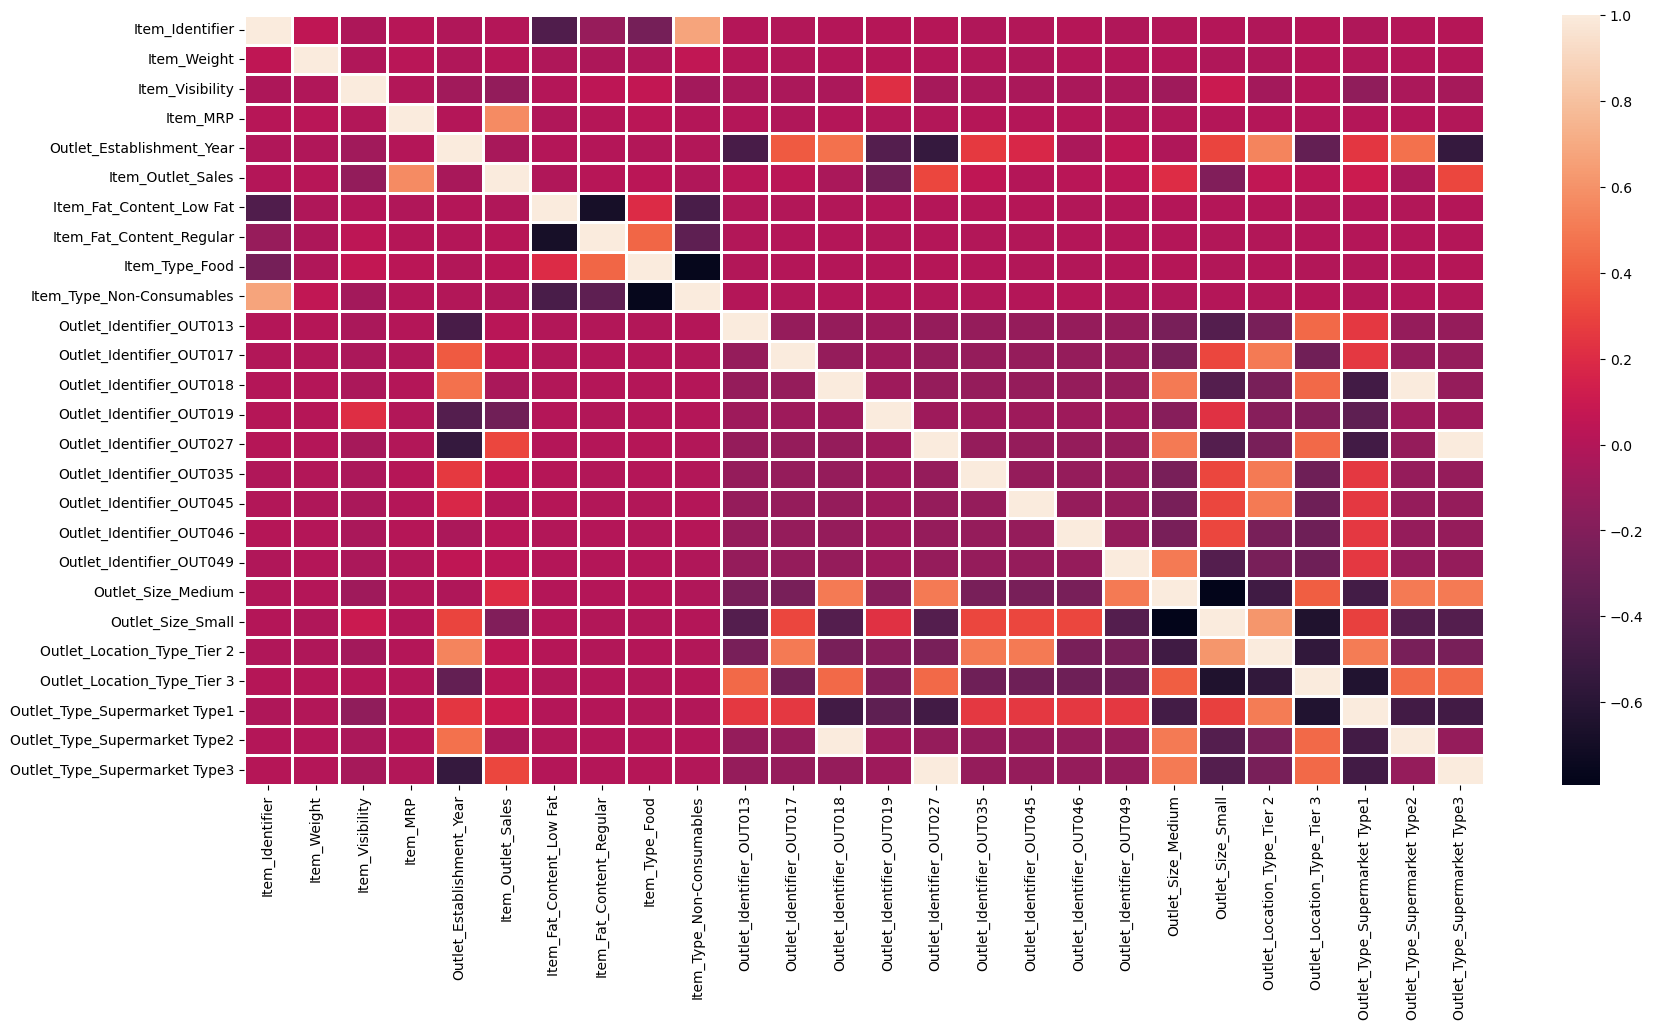

In [80]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(df.corr(), linewidths=1.0, ax=ax)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

In [82]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6818, 25) (1705, 25) (6818,) (1705,)


In [85]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
lreg = LinearRegression()

In [87]:
# Fitting the standardized data into the Linear Regression model
lreg.fit(X_train, y_train)

LinearRegression()

In [88]:
y_test_p = lreg.predict(X_test)
y_train_p = lreg.predict(X_train)

In [89]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_p))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_p))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_p)))
print("R2 score:", metrics.r2_score(y_test, y_test_p))

MSE: 1207948.2751429828
MAE: 825.9737864983617
RMSE: 1099.0670021172425
R2 score: 0.5567755546445081


### A function is defined to use Cross validation for other models.

In [90]:
def model_eval(model, X, y, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2','neg_root_mean_squared_error'))
    print('Model:', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV Scores:', r2_scores)
    print('R2 CV Scores Mean', np.mean(r2_scores))
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV Scores:', rmse_scores)
    print('RMSE Scores Mean', np.mean(rmse_scores))

In [91]:
rfr = RandomForestRegressor(random_state=101)

In [92]:
model_eval(model=rfr,X=X_train, y=y_train )

Model: RandomForestRegressor(random_state=101)
R2 CV Scores: [0.56377676 0.57502016 0.54624873 0.5274151  0.58975095]
R2 CV Scores Mean 0.5604423411723536
RMSE CV Scores: [1085.784266447472, 1142.49394533508, 1175.8513282023207, 1184.9453187185782, 1106.5057040338945]
RMSE Scores Mean 1139.116112547469


In [93]:
gbr = GradientBoostingRegressor(random_state=101)

In [94]:
model_eval(model=gbr,X=X_train, y=y_train )

Model: GradientBoostingRegressor(random_state=101)
R2 CV Scores: [0.60405034 0.58520056 0.56532973 0.57763323 0.6025623 ]
R2 CV Scores Mean 0.5869552334727794
RMSE CV Scores: [1034.4491105489387, 1128.7267646860012, 1150.862539925502, 1120.2198456198023, 1089.0915680060598]
RMSE Scores Mean 1104.6699657572608


In [95]:
dtr = DecisionTreeRegressor(random_state=101)

In [96]:
model_eval(model=dtr,X=X_train, y=y_train )

Model: DecisionTreeRegressor(random_state=101)
R2 CV Scores: [0.17264481 0.27062614 0.24280358 0.18317122 0.23945826]
R2 CV Scores Mean 0.22174080020213002
RMSE CV Scores: [1495.3234430525652, 1496.7347467169848, 1518.9649925401566, 1557.8437882170156, 1506.5772085727417]
RMSE Scores Mean 1515.088835819893


In [97]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [98]:
# Extracting important features
feature_imp = pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Item_MRP                         0.431315
Outlet_Type_Supermarket Type1    0.097051
Item_Visibility                  0.088501
Item_Weight                      0.072554
Item_Identifier                  0.070838
Outlet_Type_Supermarket Type3    0.058285
Outlet_Identifier_OUT027         0.050584
Outlet_Establishment_Year        0.024620
Outlet_Size_Small                0.019814
Outlet_Size_Medium               0.012505
Outlet_Type_Supermarket Type2    0.011973
Outlet_Identifier_OUT018         0.011485
Item_Fat_Content_Low Fat         0.006135
Outlet_Identifier_OUT019         0.006074
Item_Fat_Content_Regular         0.005846
Outlet_Identifier_OUT045         0.005613
Outlet_Identifier_OUT046         0.005515
Outlet_Identifier_OUT035         0.005014
Item_Type_Food                   0.003315
Outlet_Identifier_OUT017         0.002768
Outlet_Identifier_OUT049         0.002724
Outlet_Location_Type_Tier 2      0.002257
Outlet_Identifier_OUT013         0.001917
Outlet_Location_Type_Tier 3      0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


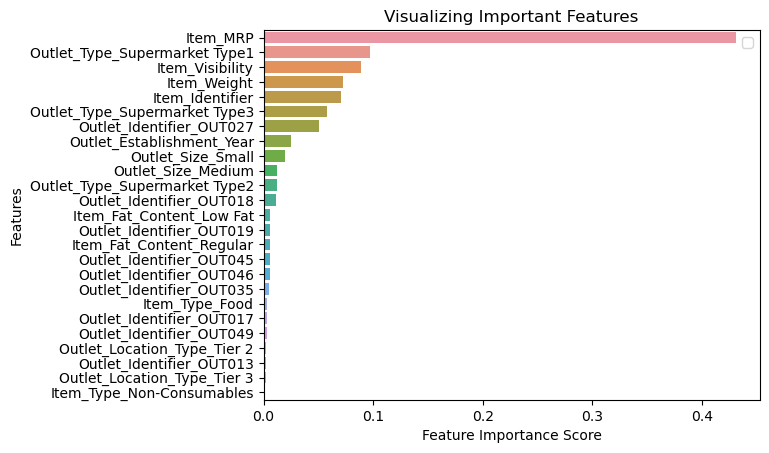

In [99]:
# Visualizing feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [100]:
#Dropping the least important variables and training the model again to check if the scores improve.

In [101]:
X = df.drop(['Item_Outlet_Sales', 'Item_Type_Food','Outlet_Identifier_OUT017','Outlet_Identifier_OUT049',       
'Outlet_Location_Type_Tier 2','Outlet_Identifier_OUT013','Outlet_Location_Type_Tier 3','Item_Type_Non-Consumables'], axis=1)
y = df['Item_Outlet_Sales']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [103]:
model_eval(model=rfr,X=X_train, y=y_train )

Model: RandomForestRegressor(random_state=101)
R2 CV Scores: [0.56419517 0.57778646 0.54884083 0.52955007 0.59077195]
R2 CV Scores Mean 0.5622288954569717
RMSE CV Scores: [1085.2634157521084, 1138.7694819827, 1172.4879382360107, 1182.2657190327386, 1105.127949528875]
RMSE Scores Mean 1136.7829009064862


* The scores did not improve. From the scores till now, the Gradient Boosting Regressor seems to be the best fit model.

In [104]:
# Trying some arbitrary parameters to check whether the scores improve.
gbr = GradientBoostingRegressor(n_estimators = 1000, max_depth= 3, min_samples_split = 5, learning_rate = 0.01)

In [105]:
model_eval(model=gbr,X=X_train, y=y_train )

Model: GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)
R2 CV Scores: [0.60518207 0.58568397 0.56552895 0.57760266 0.60428482]
R2 CV Scores Mean 0.5876564938065677
RMSE CV Scores: [1032.9696906527452, 1128.0688643274016, 1150.5987851741572, 1120.2603784861242, 1086.7289085979469]
RMSE Scores Mean 1103.725325447675
